# Life Expectancy (WHO)
#### - Statistical Analysis on factors influencing Life Expectancy -

### Brief Summary of Life Expectancy Dataset

#### Key Points:
- **Period Covered**: 2000-2015
- **Number of Countries**: 193
- **Total Rows**: 2938
- **Total Columns**: 22

#### Important Variables:
1. **Country**: Name of the country
2. **Year**: Year of the data
3. **Status**: Developed or Developing
4. **Life expectancy**: Average life expectancy in years
5. **Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population
6. **Infant Deaths**: Number of infant deaths per 1000 population
7. **Alcohol**: Per capita alcohol consumption (liters)
8. **Percentage Expenditure**: Health expenditure as a percentage of GDP per capita
9. **Hepatitis B**: Immunization coverage among 1-year-olds (%)
10. **Measles**: Number of reported cases per 1000 population
11. **BMI**: Average body mass index of the population
12. **Under-five Deaths**: Number of deaths under five years per 1000 population
13. **Polio**: Immunization coverage among 1-year-olds (%)
14. **Total Expenditure**: Government health expenditure as a percentage of total government expenditure
15. **Diphtheria**: Immunization coverage among 1-year-olds (%)
16. **HIV/AIDS**: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
17. **GDP**: Gross domestic product per capita (USD)
18. **Population**: Total population
19. **Thinness 1-19 Years**: Prevalence of thinness among children and adolescents (10-19 years)
20. **Thinness 5-9 Years**: Prevalence of thinness among children (5-9 years)
21. **Income Composition of Resources**: Human Development Index related to income composition (0-1)
22. **Schooling**: Average number of years of schooling

#### Notable Data Handling:
- **Missing Data**: Mainly for population, Hepatitis B, and GDP from lesser-known countries (e.g., Vanuatu, Tonga).
- **Excluded Countries**: Countries with significant missing data were excluded from the final dataset.

#### Study Objectives:
- Determine which factors significantly affect life expectancy.
- Assess the impact of healthcare expenditure on life expectancy in countries with lower values (<65 years).
- Analyze the effects of infant and adult mortality rates, lifestyle choices, schooling, population density, and immunization coverage on life expectancy.

This dataset provides a comprehensive basis for understanding the determinants of life expectancy and supports the development of targeted health policies and interventions.

# Importing Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset & exploring it

In [16]:
df = pd.read_csv("Life Expectancy Data 2.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [18]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [20]:
df.shape

(2938, 22)

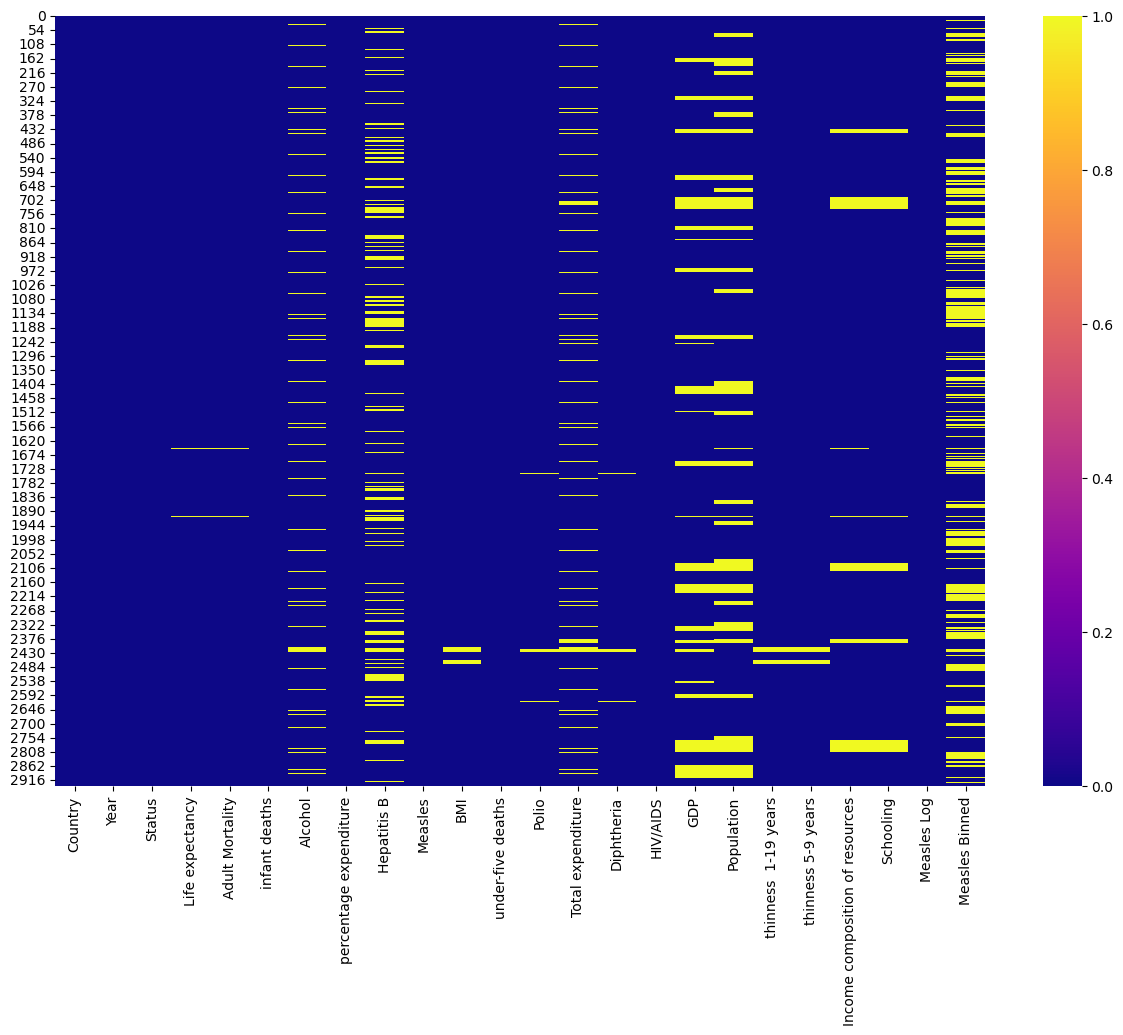

In [95]:
#visual representation of missing values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cmap = 'plasma')
plt.show()

# Column #1: Country

Description --> Name of the country where each country has 15 instances, representing 15 years

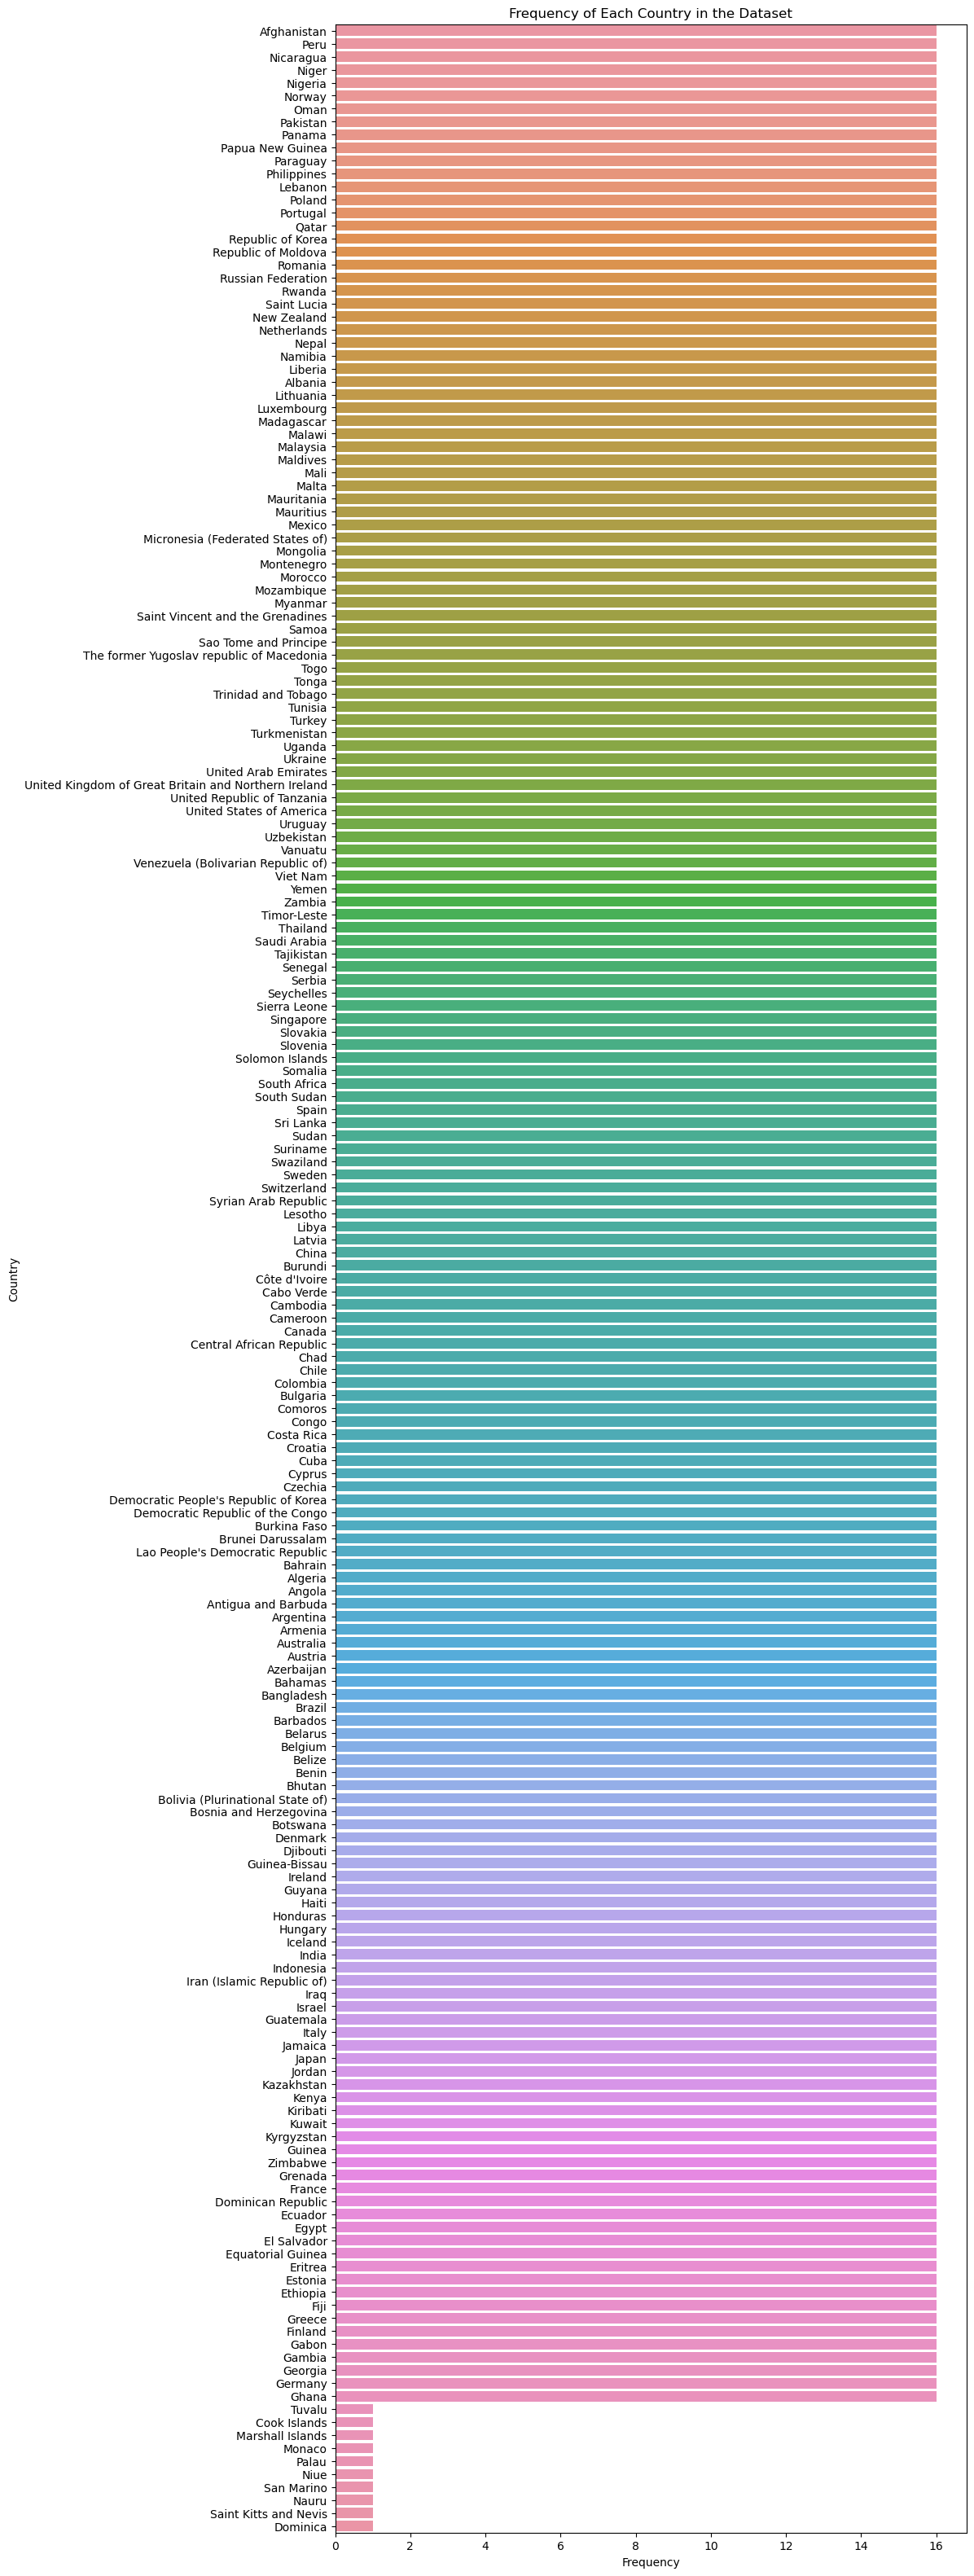

In [26]:
plt.figure(figsize=(10, 40))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Frequency of Each Country in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

### Preprocessing Recommendations:
A- The Image shows imbalance in 10 countries' data only being collected for 1 year.
- Use the median or mean values of similar countries (other small island nations or countries with similar economic status).
- Use the average values of the region these countries belong to ( Oceania ). 

B- Since there are lot's of countries, perhaps group them depending on their continent or economic status?

# Column 2 : Year

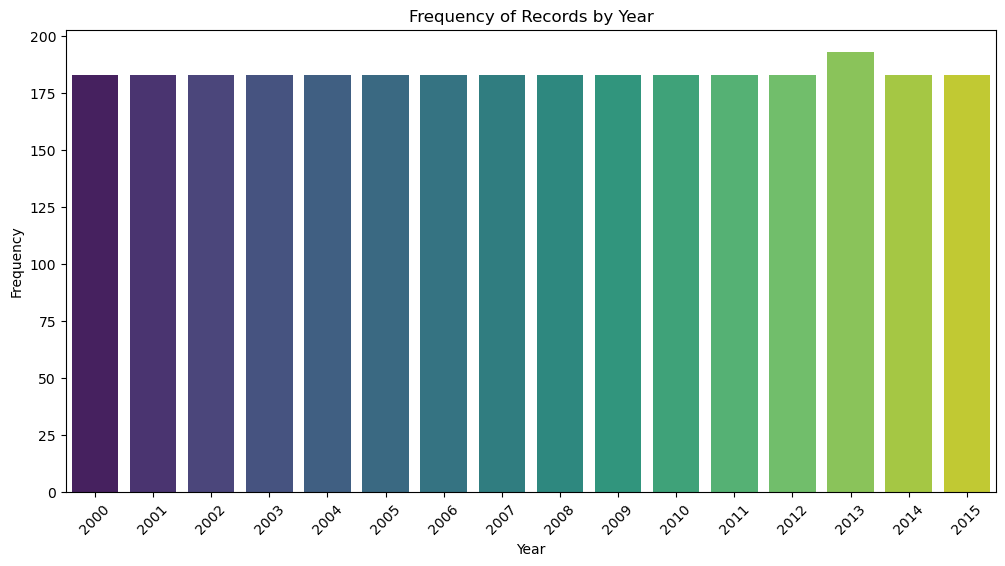

Missing values in 'Year' column: 0


In [27]:
# Visualization: Bar chart of the frequency of each year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Frequency of Records by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Check for missing values in the 'Year' column
missing_years = df['Year'].isnull().sum()
print(f"Missing values in 'Year' column: {missing_years}")


### Preprocessing recommendations:
None. 
Explore why there was a slight increase in year 13

# Column #3: Status

Description --> The "Status" column indicates whether a country is "Developed" or "Developing". 

This is a categorical variable that classifies the economic status of each country.

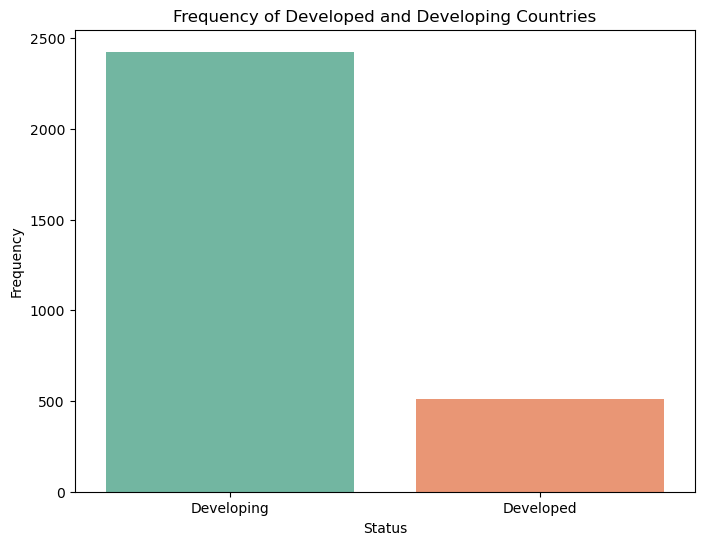

Number of Developed and Developing Countries:
Developing    2426
Developed      512
Name: Status, dtype: int64


In [29]:
# Visualization: Bar chart of the frequency of "Developed" and "Developing" countries
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Frequency of Developed and Developing Countries')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

# Print the number of developed and developing countries
status_counts = df['Status'].value_counts()
print("Number of Developed and Developing Countries:")
print(status_counts)

### Preprocessing Recommendations:
A - ( Label Encoding )  Assign 0 to "Developed" and 1 to "Developing".

B - Since there is a high difference between them:
- we can assign higher weights to the developed countries.
- or decrease the number of samples for developing countries.
- or Increase the number of samples for developed countries synthetically.

# Column 4: Life expectancy

Desription --> represents the average number of years a newborn is expected to live if current mortality rates continue to apply.

This is a numerical variable that indicates the life expectancy in years.

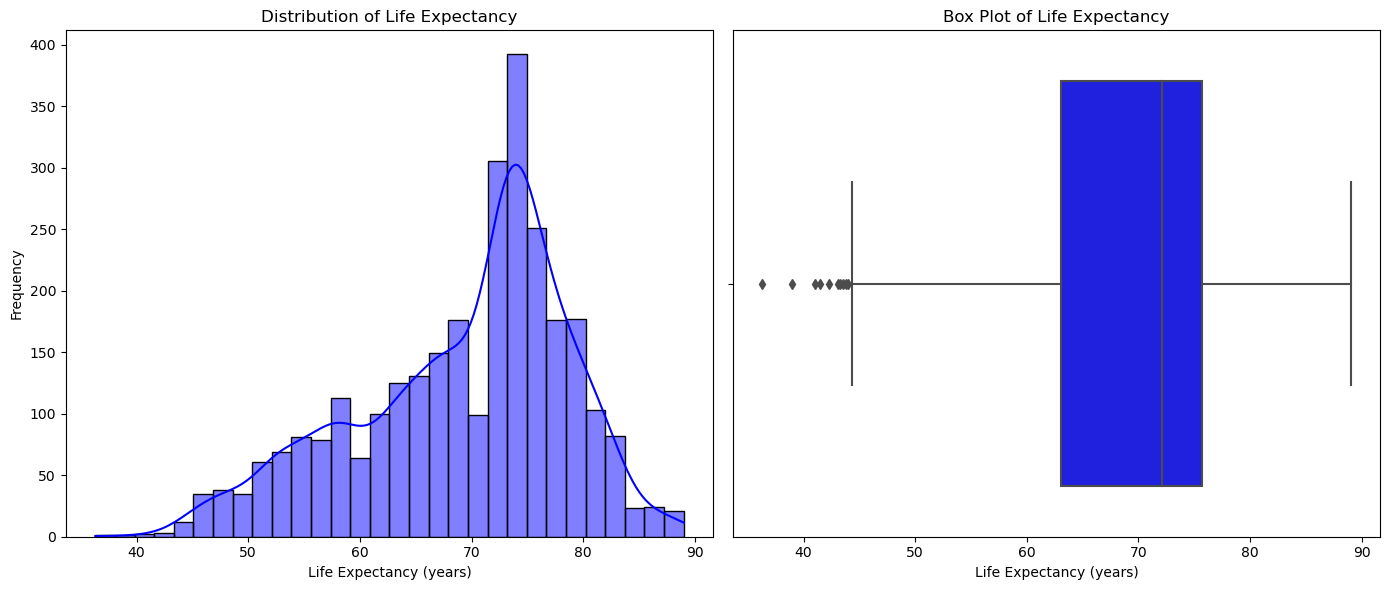

Missing values in 'Life expectancy' column: 10


In [32]:
# Visualization: Histogram and box plot of Life Expectancy
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Life expectancy '], bins=30, kde=True, color='blue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Life expectancy '], color='blue')
plt.title('Box Plot of Life Expectancy')
plt.xlabel('Life Expectancy (years)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Life expectancy' column
missing_life_expectancy = df['Life expectancy '].isnull().sum()
print(f"Missing values in 'Life expectancy' column: {missing_life_expectancy}")


### Preprocessing Recommendations:
Since there are missing values, we could need to fill them,

My recommendation is:
- Fill the missing tuple with the average/mean life expectancy of that same country.

* For the outliers:
1- Identify outliers within each country's data over the years.

2- If the values are consistent within a country, they should not be treated as outliers.

3- Otherwise, use appropriate techniques like log transformation on a country basis.

# Column 5: Adult Mortality

Description --> The number of adult deaths per 1000 population aged 15 to 60.

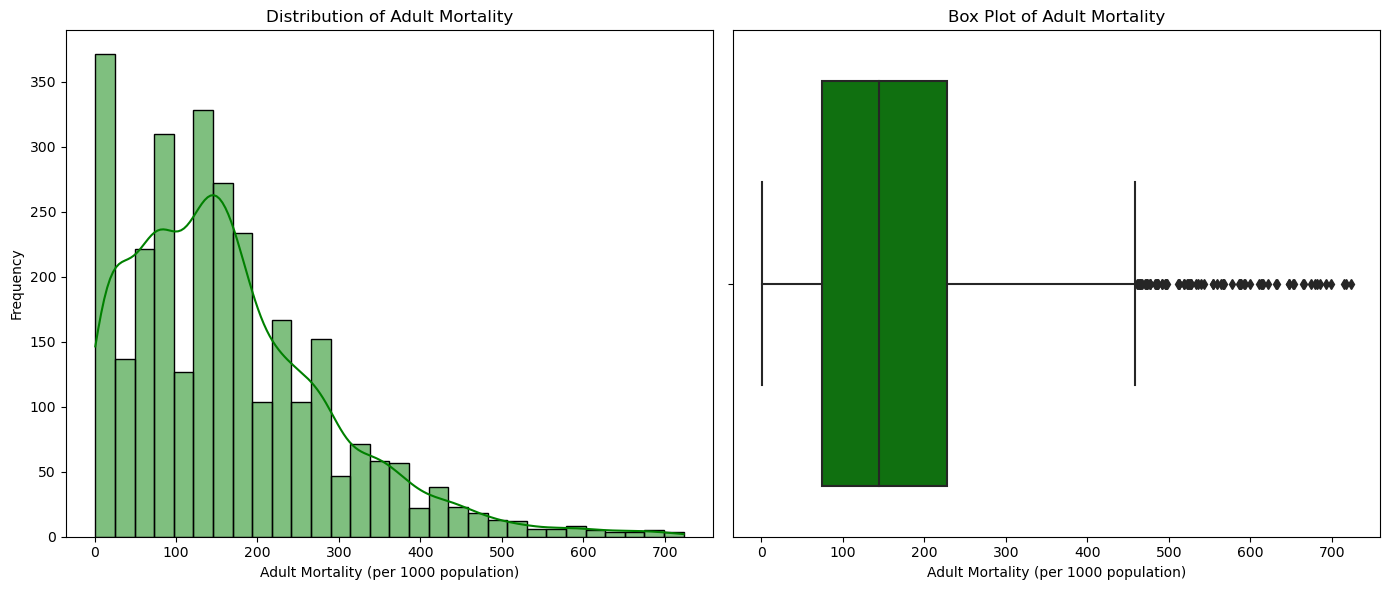

Missing values in 'Adult Mortality' column: 10


In [33]:
# Visualization: Histogram and box plot of Adult Mortality
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Adult Mortality'], bins=30, kde=True, color='green')
plt.title('Distribution of Adult Mortality')
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Adult Mortality'], color='green')
plt.title('Box Plot of Adult Mortality')
plt.xlabel('Adult Mortality (per 1000 population)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Adult Mortality' column
missing_adult_mortality = df['Adult Mortality'].isnull().sum()
print(f"Missing values in 'Adult Mortality' column: {missing_adult_mortality}")

### Preprocessing Recommendation:
A - For the 10 missing values:

Fill the missing values with the average/mean adult mortality rate of the same country. This is how I can maintain the country's characteristics.


B - For the outliers:  This box plot represents outliers word wide, but what might be an outlier on a global scale could be a normal value for a specific country.

My recommendation approach:

* Group by Country: First, group the data by country.

* Identify Outliers Within Each Country: Check for outliers within each country's data rather than across the entire dataset.

* Leave the country-specific "outliers" as they are since they represent normal values for that country.

* Only "handle" outliers that are extreme for each country, if needed.

"Handling" the outlier if they are indeed an outlier for that specific country:

Apply log transformation.

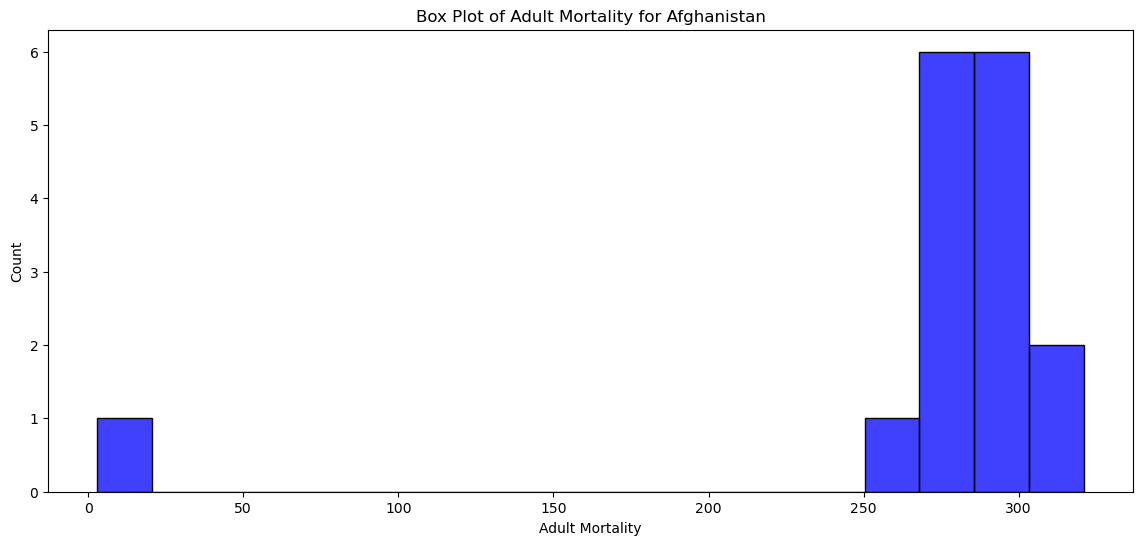

In [103]:
afghanistan_data = df[df['Country'] == 'Afghanistan']

plt.figure(figsize=(14, 6))
sns.histplot(x=afghanistan_data['Adult Mortality'], color='blue')
plt.title('Box Plot of Adult Mortality for Afghanistan')
plt.xlabel('Adult Mortality')
plt.show()

# Column 6: Infant deaths:

Description --> The number of infant deaths per 1000 live births.

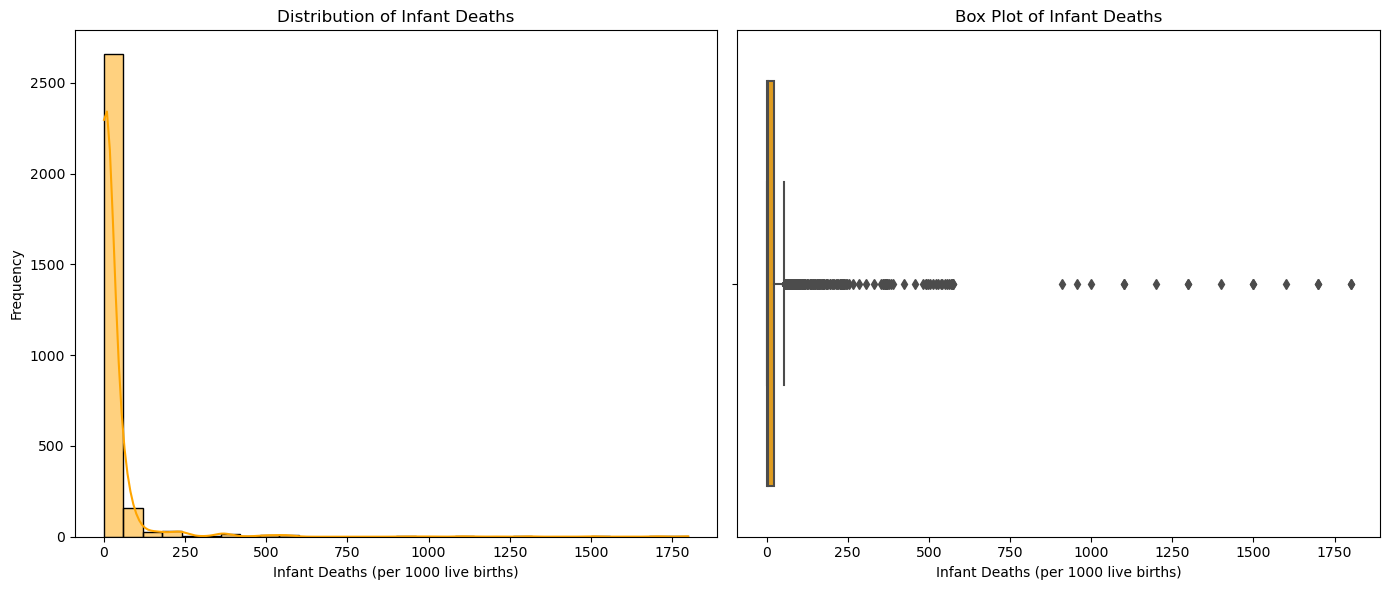

Missing values in 'infant deaths' column: 0


In [35]:
# Visualization: Histogram and box plot of infant deaths
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['infant deaths'], bins=30, kde=True, color='orange')
plt.title('Distribution of Infant Deaths')
plt.xlabel('Infant Deaths (per 1000 live births)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['infant deaths'], color='orange')
plt.title('Box Plot of Infant Deaths')
plt.xlabel('Infant Deaths (per 1000 live births)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'infant deaths' column
missing_infant_deaths = df['infant deaths'].isnull().sum()
print(f"Missing values in 'infant deaths' column: {missing_infant_deaths}")

### Preprocessing Reccommendations:

For the outliers: This box plot represents outliers word wide, but what might be an outlier on a global scale could be a normal value for a specific country.

My recommendation approach:

Group by Country: First, group the data by country.

Identify Outliers Within Each Country: Check for outliers within each country's data rather than across the entire dataset.

Leave the country-specific "outliers" as they are since they represent normal values for that country.

Only "handle" outliers that are extreme for each country, if needed.

"Handling" the outlier if they are indeed an outlier for that specific country:

Instead of removing data points entirely, use IQR so that:

Any value below the lower bound is replaced with the lower bound.

Any value above the upper bound is replaced with the upper bound.

# Column 7: Alcohol

Description --> Represents the alcohol consumption per person (in liters) in a specific country

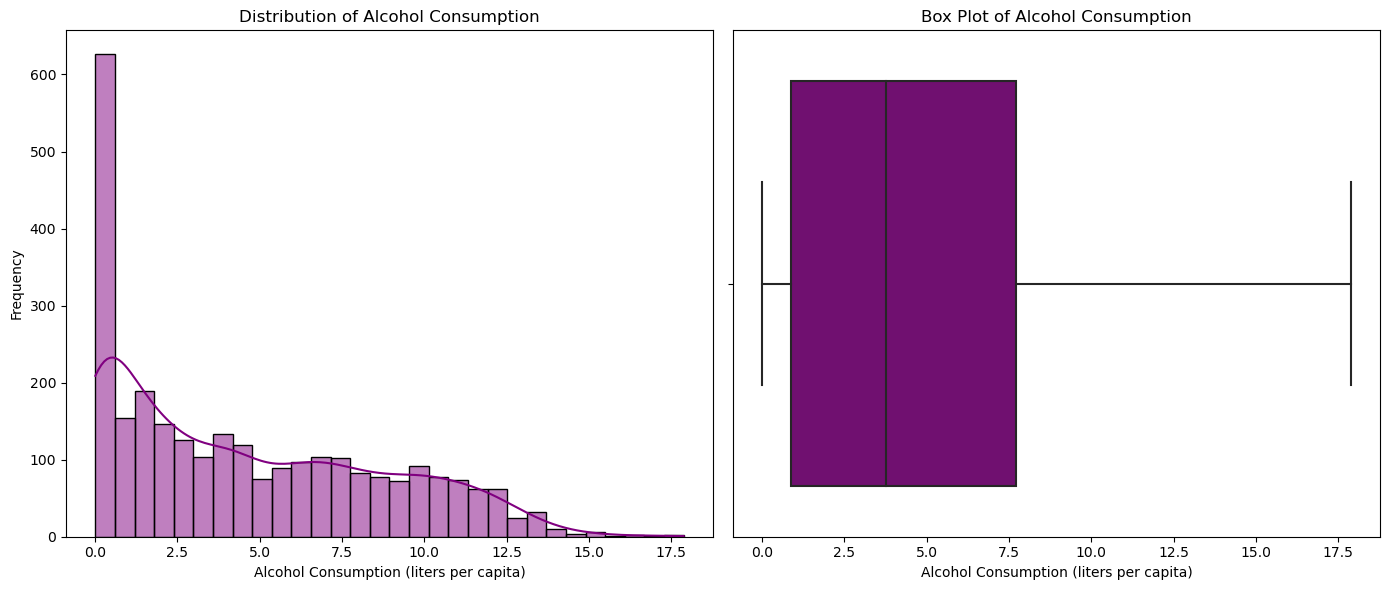

Missing values in 'Alcohol' column: 194


In [37]:
# Visualization: Histogram and box plot of Alcohol
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Alcohol'], bins=30, kde=True, color='purple')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption (liters per capita)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Alcohol'], color='purple')
plt.title('Box Plot of Alcohol Consumption')
plt.xlabel('Alcohol Consumption (liters per capita)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Alcohol' column
missing_alcohol = df['Alcohol'].isnull().sum()
print(f"Missing values in 'Alcohol' column: {missing_alcohol}")


### Preprocessing Recommendation:
Fill missing values with the mean alcohol consumption for the same country.

# Column 8: percentage expenditure

Description --> Represents government health expenditure as a percentage of GDP. 
This is a numerical variable indicating the proportion of a country's GDP spent on healthcare.

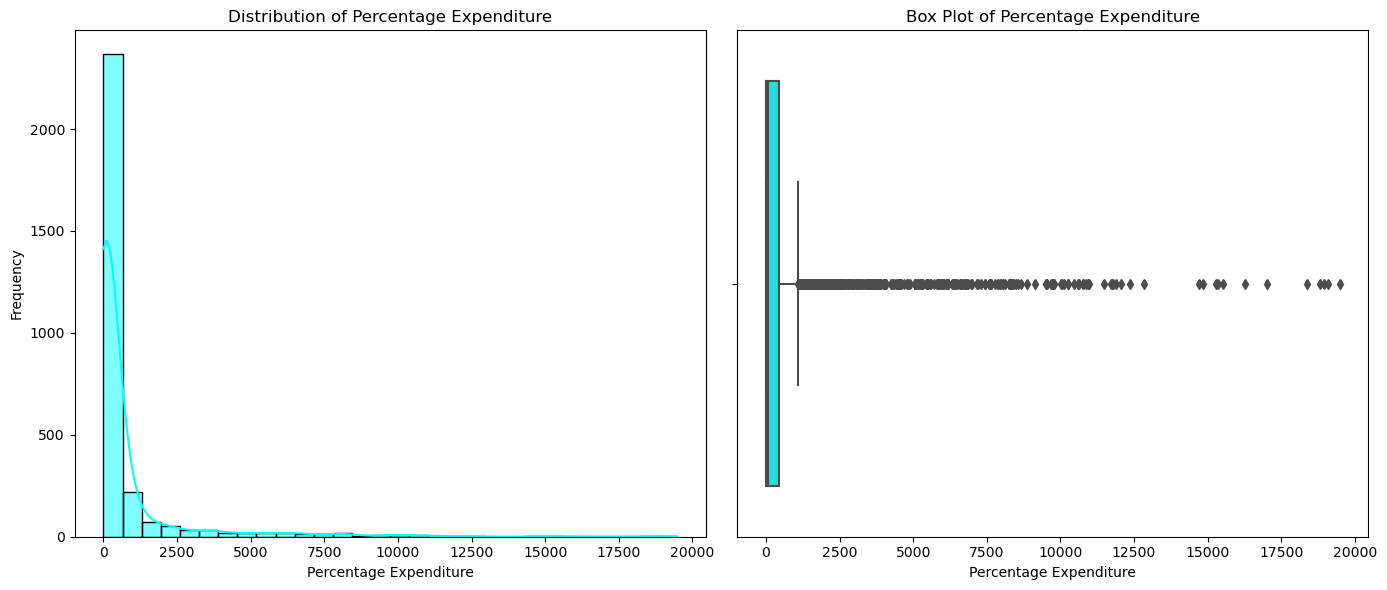

Missing values in 'percentage expenditure' column: 0


In [38]:
# Visualization: Histogram and box plot of percentage expenditure
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['percentage expenditure'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Percentage Expenditure')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['percentage expenditure'], color='cyan')
plt.title('Box Plot of Percentage Expenditure')
plt.xlabel('Percentage Expenditure')

plt.tight_layout()
plt.show()

# Check for missing values in the 'percentage expenditure' column
missing_percentage_expenditure = df['percentage expenditure'].isnull().sum()
print(f"Missing values in 'percentage expenditure' column: {missing_percentage_expenditure}")


### Preprocessing Recommendations:
Identify and handle outliers on a country-by-country basis. 
Given the significant outliers shown in the box plot, We have to ensure that these outliers are handled appropriately within the context of each country.

If found, handling them in a suitable for its skewness such as:
* Country-Specific Z-Score Method: Calculate the Z-score within each country group and then cap or remove values that fall outside a certain range (e.g., beyond 3 standard deviations from the mean).

# Column 9: Hepatitis B

Description -->  represents the Hepatitis B immunization coverage among 1-year-olds, expressed as a percentage.
This is a numerical variable indicating the immunization rate.

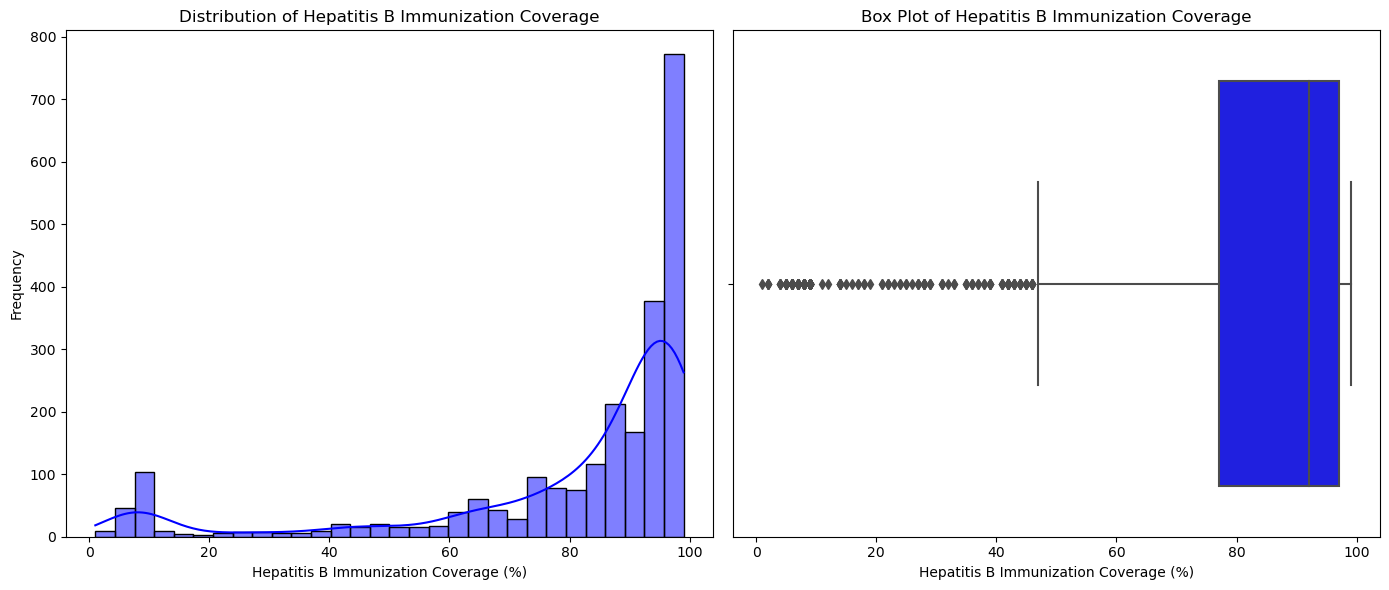

Missing values in 'Hepatitis B' column: 553


In [40]:
 #Visualization: Histogram and box plot of Hepatitis B
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Hepatitis B'], bins=30, kde=True, color='blue')
plt.title('Distribution of Hepatitis B Immunization Coverage')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Hepatitis B'], color='blue')
plt.title('Box Plot of Hepatitis B Immunization Coverage')
plt.xlabel('Hepatitis B Immunization Coverage (%)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Hepatitis B' column
missing_hepatitis_b = df['Hepatitis B'].isnull().sum()
print(f"Missing values in 'Hepatitis B' column: {missing_hepatitis_b}")

### Preprocessing Recommendations: 
* For the missing values, we could use it's 0.61 correlation with "Diphtheria" to estimate missing values using a predictive regression model.

* For the outliers, start by checking the outlier's existance on a country basis, then use the IQR method or the z-score to handle the outtliers if they truly exist within the country


# Column 10: Measles

Description -->  represents the number of reported measles cases per 1000 population. 
This is a numerical variable indicating the incidence of measles

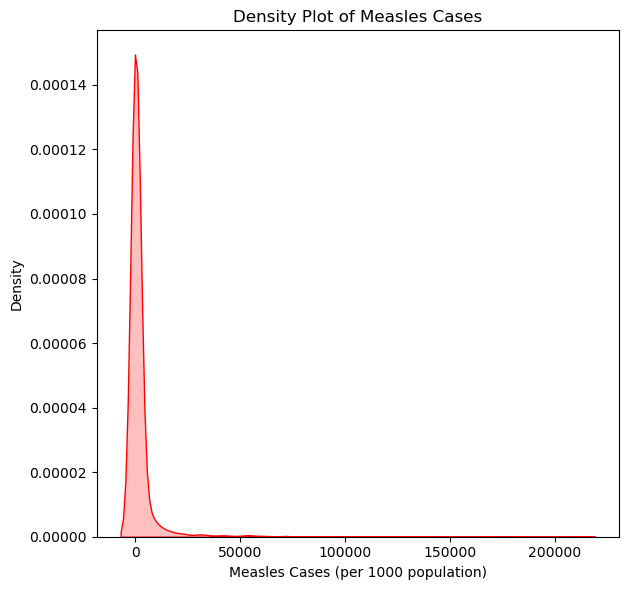

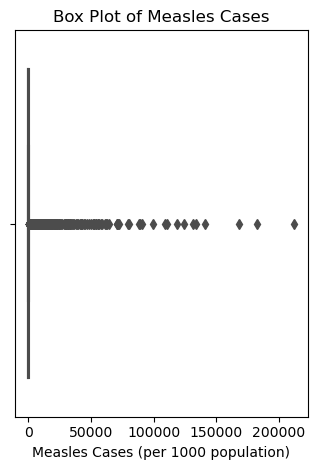

Missing values in 'Measles' column: 0


In [48]:
# Visualization: Bar plot, Box plot, and Density plot of Measles
plt.figure(figsize=(18, 6))

# Density plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['Measles '], fill=True, color='red')
plt.title('Density Plot of Measles Cases')
plt.xlabel('Measles Cases (per 1000 population)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Measles '], color='red')
plt.title('Box Plot of Measles Cases')
plt.xlabel('Measles Cases (per 1000 population)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Measles' column
missing_measles = df['Measles '].isnull().sum()
print(f"Missing values in 'Measles' column: {missing_measles}")

### Preprocessing Recommendations: 
* Apply transformations like log transformation (df['Measles Log'] = np.log1p(df['Measles '])) to reduce the skewness shown in the density plot and the outliers

# Column 11: BMI

Description --> represents the average body mass index (BMI) of the population. 
This is a numerical variable indicating the average BMI in each country.

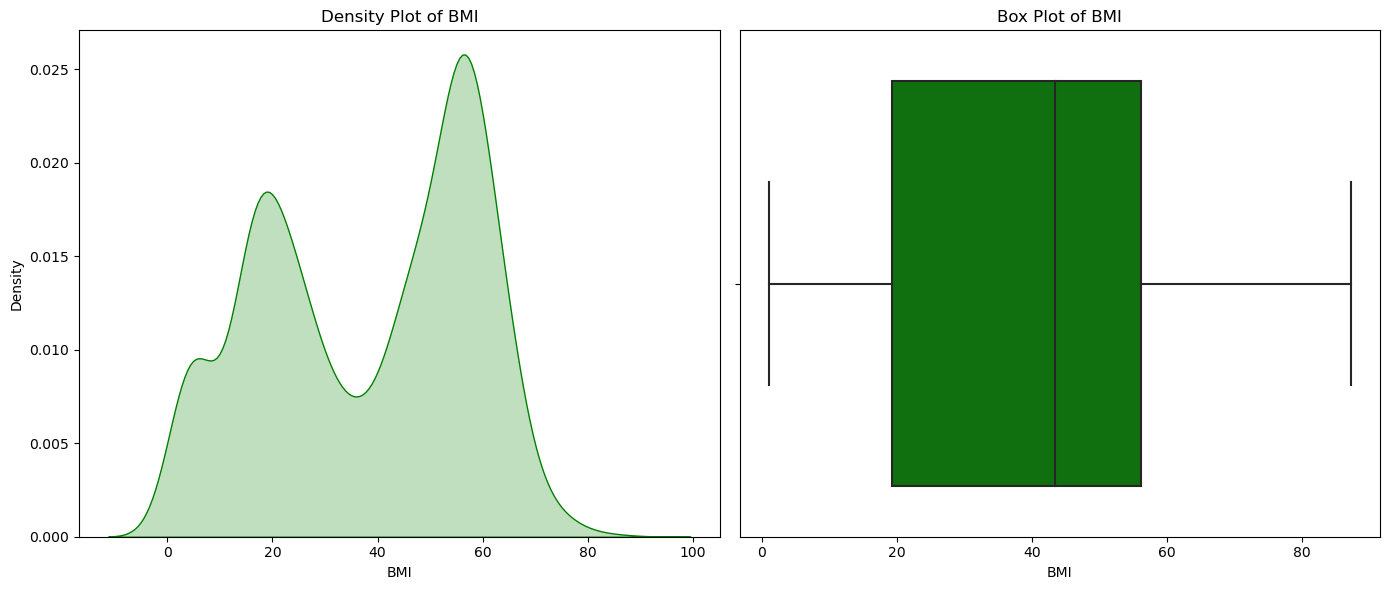

Missing values in 'BMI' column: 34


In [54]:
# Visualization: Density plot and box plot of BMI
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df[' BMI '], fill=True, color='green')
plt.title('Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[' BMI '], color='green')
plt.title('Box Plot of BMI')
plt.xlabel('BMI')

plt.tight_layout()
plt.show()

# Check for missing values in the 'BMI' column
missing_bmi = df[' BMI '].isnull().sum()
print(f"Missing values in 'BMI' column: {missing_bmi}")

### Preprocessing Recommendations: 
* Use the mean or median BMI values of the same country to fill in the missing values.

# Column 12: under-five deaths

Description -->  represents the number of deaths of children under the age of five per 1000 live births. 

This is a numerical variable indicating the mortality rate for children under five.

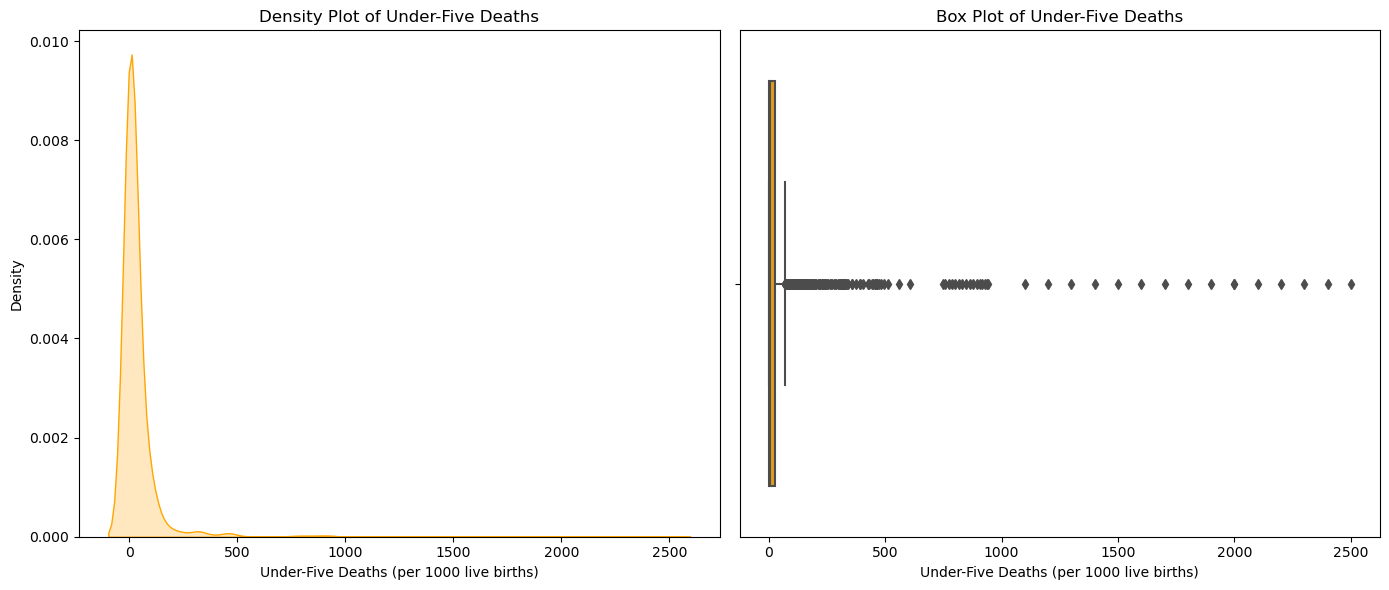

Missing values in 'under-five deaths' column: 0


In [57]:

# Visualization: Density plot and box plot of under-five deaths
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df['under-five deaths '], fill=True, color='orange')
plt.title('Density Plot of Under-Five Deaths')
plt.xlabel('Under-Five Deaths (per 1000 live births)')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['under-five deaths '], color='orange')
plt.title('Box Plot of Under-Five Deaths')
plt.xlabel('Under-Five Deaths (per 1000 live births)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'under-five deaths' column
missing_under_five_deaths = df['under-five deaths '].isnull().sum()
print(f"Missing values in 'under-five deaths' column: {missing_under_five_deaths}")


### Preprocessing Recommendations:
* Apply transformations to reduce skewness and manage outliers.

This can help reduce skewness and make the distribution more normal-like.
example: df['under-five deaths Log'] = np.log1p(df['under-five deaths ']).

Make sure you group them by country to make it on a country basis first.

# Column 13: Polio

Description --> represents the percentage of children immunized for Polio.

This is a numerical variable indicating the immunization rate against Polio among children.

AKA The higher the better

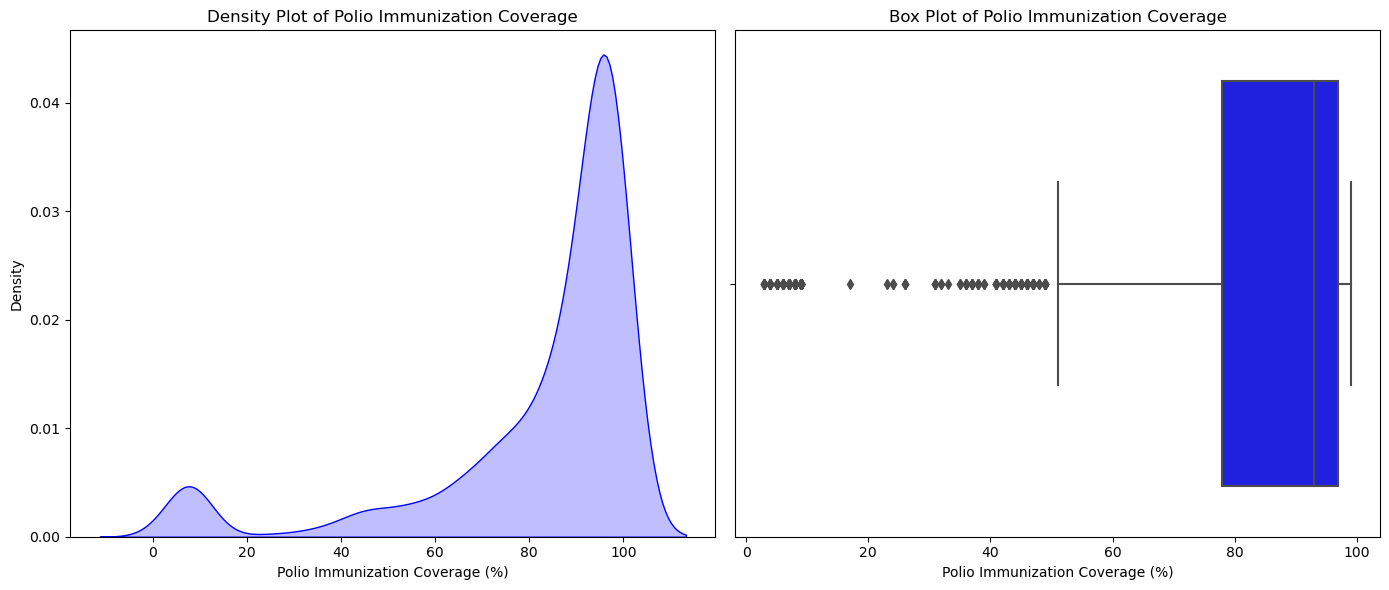

Missing values in 'Polio' column: 19


In [59]:
# Visualization: Density plot and box plot of Polio immunization coverage
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df['Polio'], fill=True, color='blue')
plt.title('Density Plot of Polio Immunization Coverage')
plt.xlabel('Polio Immunization Coverage (%)')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Polio'], color='blue')
plt.title('Box Plot of Polio Immunization Coverage')
plt.xlabel('Polio Immunization Coverage (%)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Polio' column
missing_polio = df['Polio'].isnull().sum()
print(f"Missing values in 'Polio' column: {missing_polio}")


### Preprocessing Recommendations:
* For the 19 missing values:
 Use the correlation with "Diphtheria" to estimate missing values.
 Use a regression model to predict missing values based on "Diphtheria" coverage.
 
* For the outliers: 
Apply transformations to reduce skewness and manage outliers.

This can help reduce skewness and make the distribution more normal-like.

Make sure you group them by country to make it on a country basis first.

# Column 14: Total expenditure

Description -->  represents the total expenditure on health as a percentage of GDP. This is a numerical variable indicating the proportion of a country's GDP spent on healthcare.

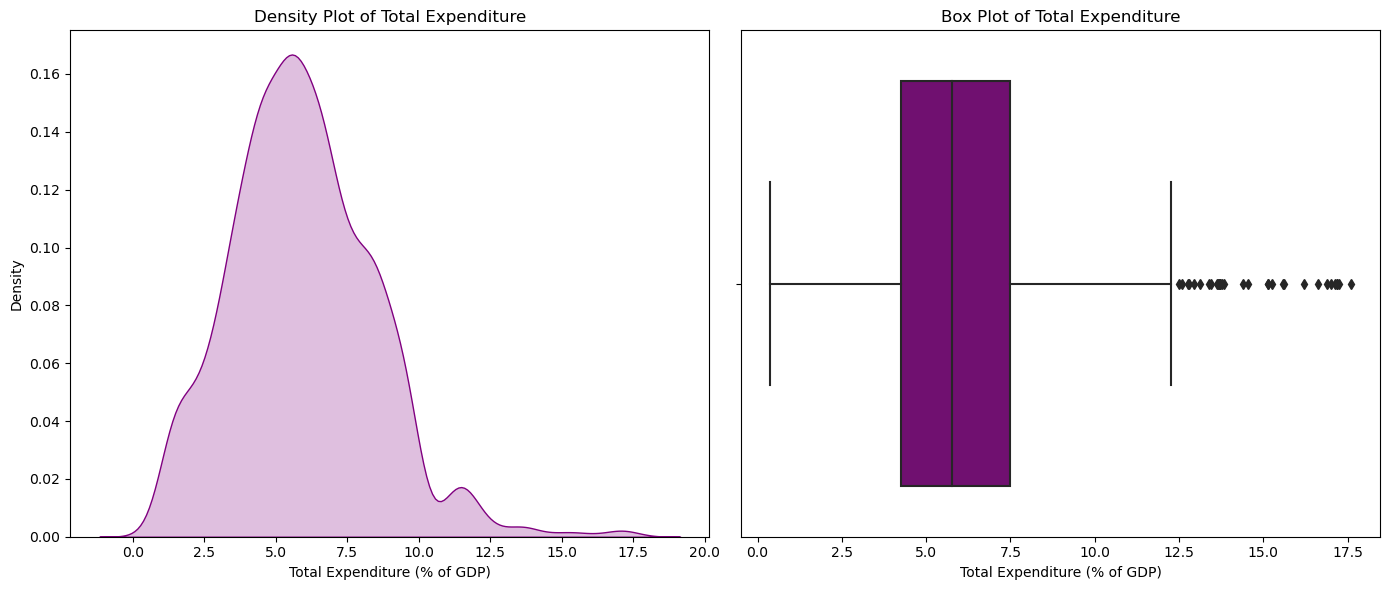

Missing values in 'Total expenditure' column: 226


In [61]:
# Visualization: Density plot and box plot of Total expenditure
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df['Total expenditure'], fill=True, color='purple')
plt.title('Density Plot of Total Expenditure')
plt.xlabel('Total Expenditure (% of GDP)')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total expenditure'], color='purple')
plt.title('Box Plot of Total Expenditure')
plt.xlabel('Total Expenditure (% of GDP)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Total expenditure' column
missing_total_expenditure = df['Total expenditure'].isnull().sum()
print(f"Missing values in 'Total expenditure' column: {missing_total_expenditure}")


### Preprocessing Recommendations: 

* Fill Missing Values Using country-specific mean for imputation.
* Suggest handling outliers on a country-by-country basis using log transformation or IQR method

# Column 15: Diphtheria

Description --> represents the percentage of children immunized for Diphtheria. 

This is a numerical variable indicating the immunization rate against Diphtheria among children.

AKA the higher the better

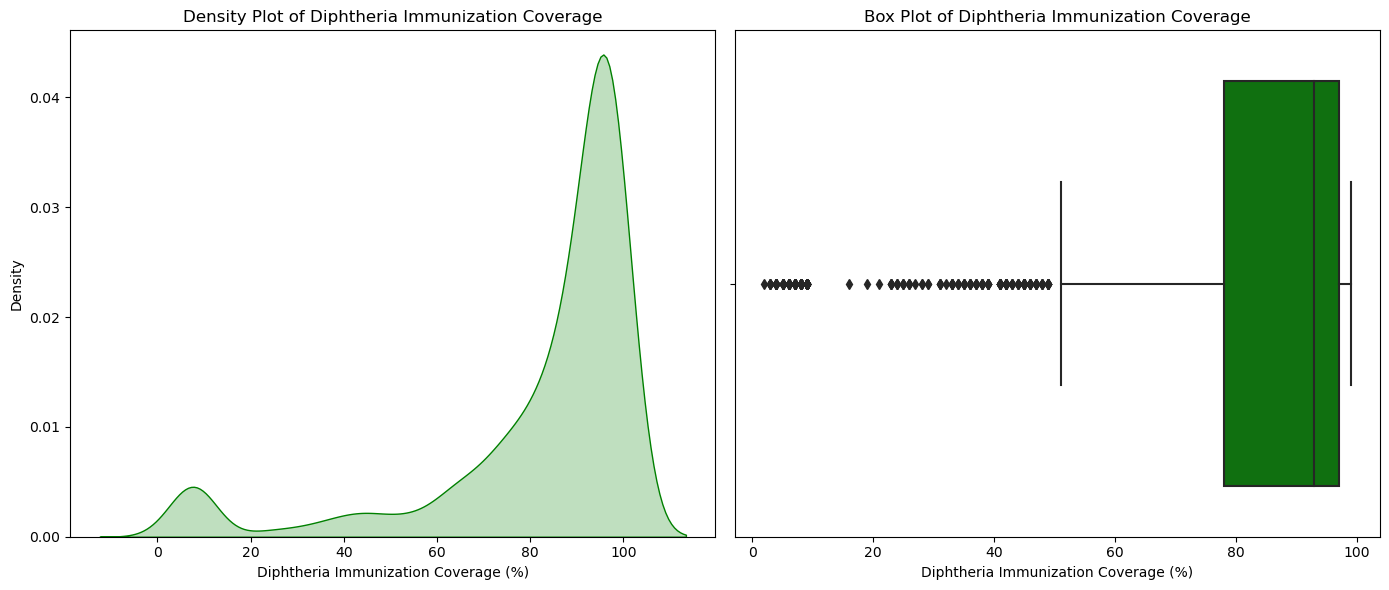

Missing values in 'Diphtheria' column: 19


In [72]:
# Visualization: Density plot and box plot of Diphtheria immunization coverage
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df['Diphtheria '], fill=True, color='green')
plt.title('Density Plot of Diphtheria Immunization Coverage')
plt.xlabel('Diphtheria Immunization Coverage (%)')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Diphtheria '], color='green')
plt.title('Box Plot of Diphtheria Immunization Coverage')
plt.xlabel('Diphtheria Immunization Coverage (%)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'Diphtheria' column
missing_diphtheria = df['Diphtheria '].isnull().sum()
print(f"Missing values in 'Diphtheria' column: {missing_diphtheria}")


### Preprocessing Recommendations: 
* Identify and handle outliers on a country-by-country basis.
* Use the correlation with "Polio" to estimate missing values.
* Use a regression model to predict missing values based on "Polio" coverage.
 
* For the outliers: 
Apply transformations to reduce skewness and manage outliers.

This can help reduce skewness and make the distribution more normal-like.

Make sure you group them by country to make it on a country basis first.

# Column 16: HIV/AIDS

Description -->  represents the death rate due to HIV/AIDS per 1,000 people.

 This column is a numerical variable indicating the mortality rate associated with HIV/AIDS.

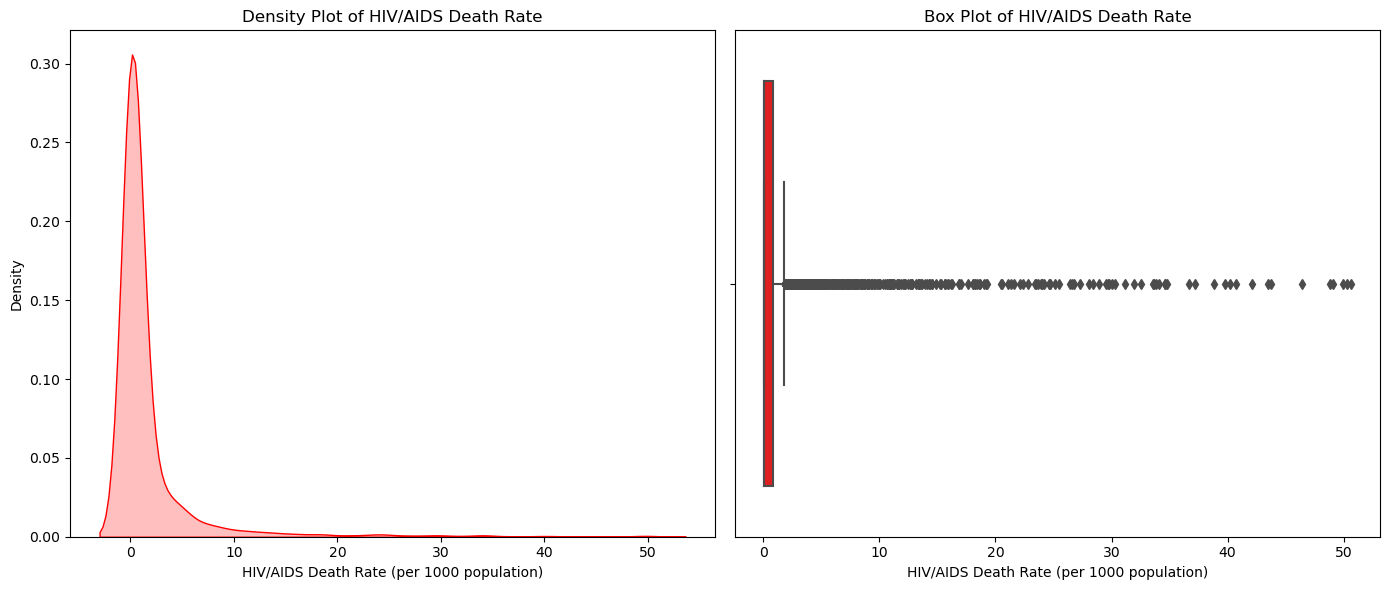

Missing values in 'HIV/AIDS' column: 0


In [76]:

# Visualization: Density plot and box plot of HIV/AIDS death rate
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df[' HIV/AIDS'], fill=True, color='red')
plt.title('Density Plot of HIV/AIDS Death Rate')
plt.xlabel('HIV/AIDS Death Rate (per 1000 population)')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[' HIV/AIDS'], color='red')
plt.title('Box Plot of HIV/AIDS Death Rate')
plt.xlabel('HIV/AIDS Death Rate (per 1000 population)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'HIV/AIDS' column
missing_hiv_aids = df[' HIV/AIDS'].isnull().sum()
print(f"Missing values in 'HIV/AIDS' column: {missing_hiv_aids}")


### Preprocessing Recommendations: 
Since there are no missing values, the main focus will be on handling outliers and normalizing/standardizing the data.
* For the outliers, after grouping them on a country basis, what is the best way to handle them? is it Log Transformation? IQR? Z-score?

Given the nature of the "HIV/AIDS" data, which is right-skewed, a log transformation might be a good starting point. After the log transformation, you can then check if the data is still skewed and, if needed, apply the IQR method or Z-score method.

# Column 17: GDP

Description --> represents the Gross Domestic Product per capita in USD. 

This column is a numerical variable indicating the economic output per person.


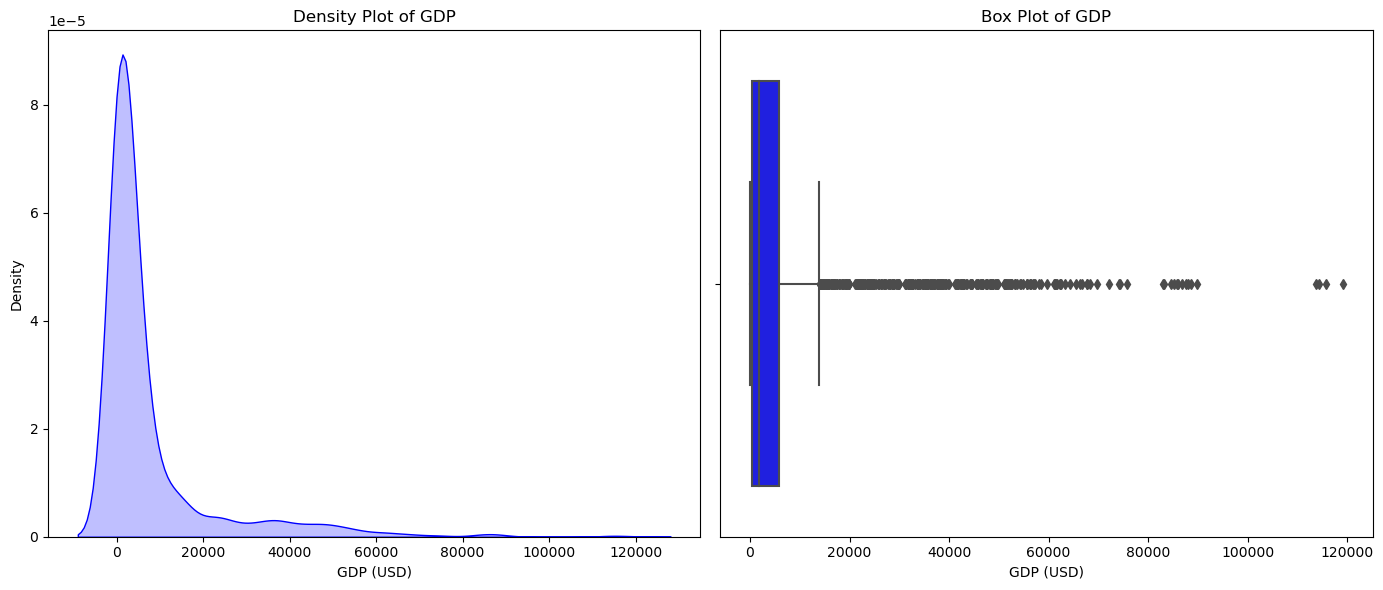

Missing values in 'GDP' column: 448


In [78]:

# Visualization: Density plot and box plot of GDP
plt.figure(figsize=(14, 6))

# Density plot
plt.subplot(1, 2, 1)
sns.kdeplot(df['GDP'], fill=True, color='blue')
plt.title('Density Plot of GDP')
plt.xlabel('GDP (USD)')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['GDP'], color='blue')
plt.title('Box Plot of GDP')
plt.xlabel('GDP (USD)')

plt.tight_layout()
plt.show()

# Check for missing values in the 'GDP' column
missing_gdp = df['GDP'].isnull().sum()
print(f"Missing values in 'GDP' column: {missing_gdp}")


### Preprocessing Recommendations: 

* For the outliers:
group them on a country basis, and apply log transformation

* For the missing values:
Since it is highly(0.9) correlated with percentage expenditure, Use a regression model based on percentage expenditure to predict and fill missing GDP values.

# Column 18: Population

Description --> This column represents the total population of each country for each year in the dataset.

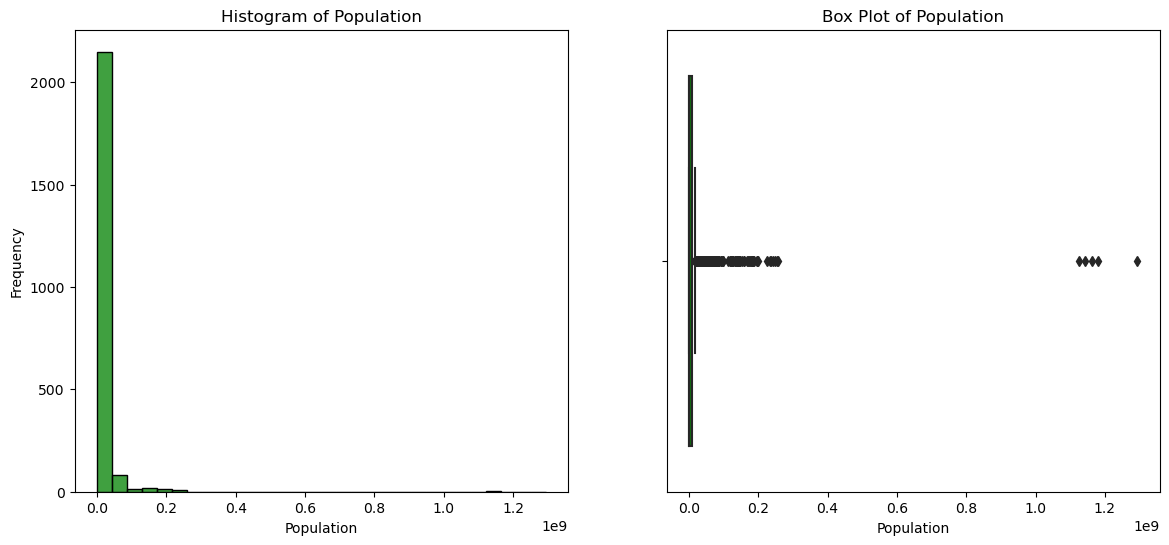

Missing values in 'Population' column: 652


In [85]:

plt.figure(figsize=(14, 6))

# Histogram for Population
plt.subplot(1, 2, 1)
sns.histplot(df['Population'], color='green', bins=30)
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Box plot for Population
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Population'], color='green')
plt.title('Box Plot of Population')
plt.xlabel('Population')

#plt.tight_layout()
plt.show()

# Check for missing values in the Population column
missing_population = df['Population'].isnull().sum()
print(f"Missing values in 'Population' column: {missing_population}")

### Preprocessing Recommendations: 
*  log transformation sice the data is highly skewed, which would help in outliers.

Given the high skewness and large outliers, applying a log transformation can help normalize the distribution and reduce the impact of outliers. 
* For the missing values: Since population data changes smoothly over time, linear interpolation within each country could be a good method for filling missing values.


* Example steps:

1- Fill Missing Values Using Interpolation:
df['Population'] = df.groupby('Country')['Population'].apply(lambda x: x.interpolate(method='linear'))

2- Log Transformation:
df['Population_log'] = np.log(df['Population'] + 1)


# Column 19: Thinness 1-19 Years

Description --> This column represents the percentage of the population aged 1-19 years who are classified as thin based on their BMI (Body Mass Index).

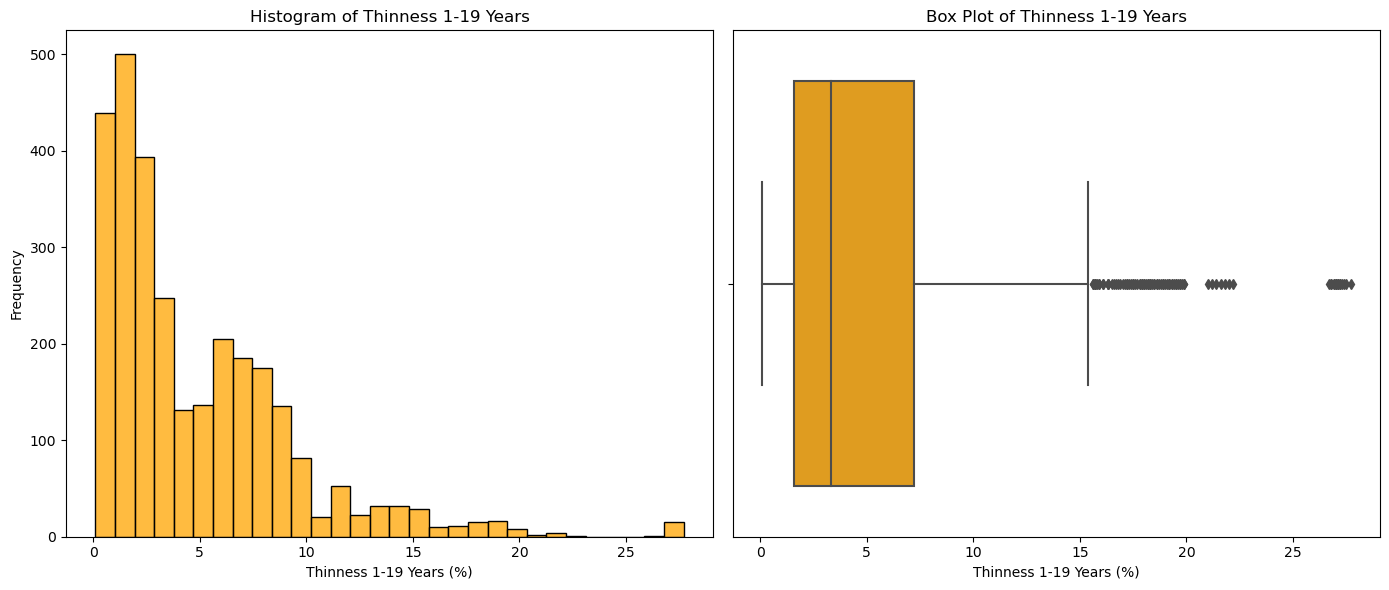

Missing values in 'thinness 1-19 years' column: 34


In [94]:
plt.figure(figsize=(14, 6))
df = df.rename(columns=lambda x: x.strip())

# Histogram for Thinness 1-19 Years
plt.subplot(1, 2, 1)
sns.histplot(df['thinness  1-19 years'], kde=False, color='orange', bins=30)
plt.title('Histogram of Thinness 1-19 Years')
plt.xlabel('Thinness 1-19 Years (%)')
plt.ylabel('Frequency')

# Box plot for Thinness 1-19 Years
plt.subplot(1, 2, 2)
sns.boxplot(x=df['thinness  1-19 years'], color='orange')
plt.title('Box Plot of Thinness 1-19 Years')
plt.xlabel('Thinness 1-19 Years (%)')

plt.tight_layout()
plt.show()

# Check for missing values in the Thinness 1-19 Years column
missing_thinness_1_19 = df['thinness  1-19 years'].isnull().sum()
print(f"Missing values in 'thinness 1-19 years' column: {missing_thinness_1_19}")


### Preprocessing Recommendations: 
* Handling Missing Values: *
Use the correlation (0.94) with "Thinness 5-9 Years" to estimate the missing values. You can fill the missing values by using a regression approach where "Thinness 1-19 Years" is predicted based on "Thinness 5-9 Years."

* Handling Outliers: *

1- Identify outliers within each country's data over the years.

2- If the values are consistent within a country, they should not be treated as outliers.

3- Otherwise, use appropriate techniques like log transformation on a country basis.

# Column 20: Thinness 5-9 Years

Description --> This column represents the percentage of the population aged 5-9 years who are classified as thin based on their BMI (Body Mass Index).


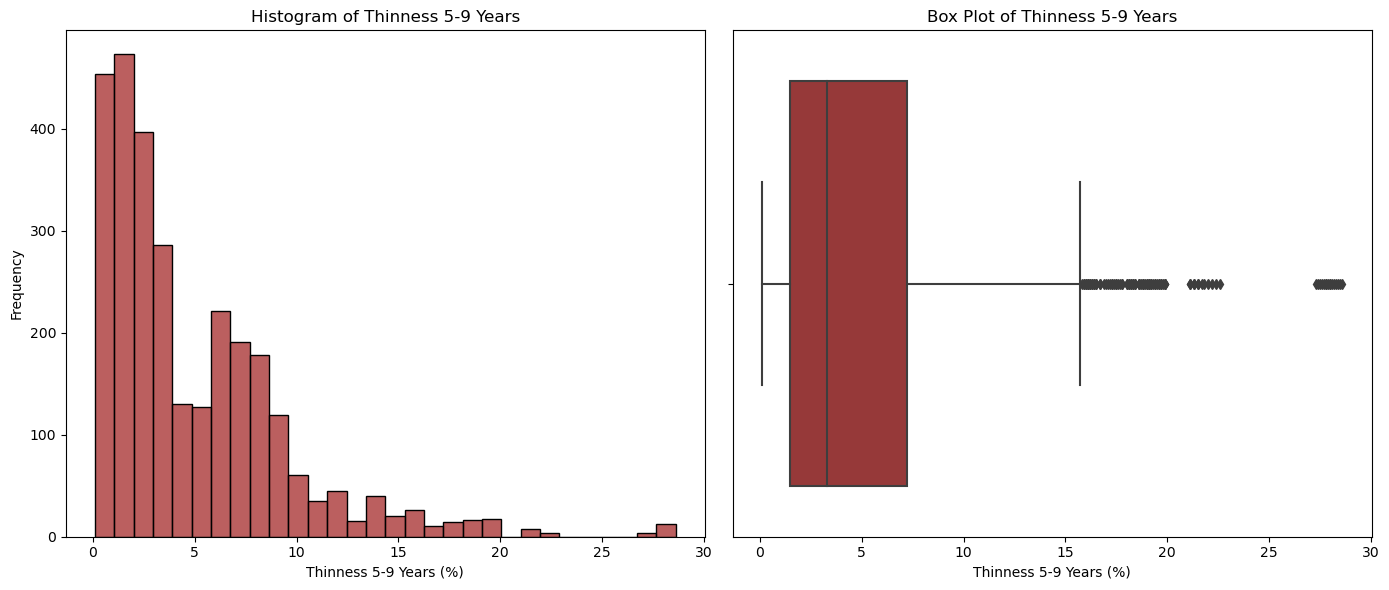

Missing values in 'thinness 5-9 years' column: 34


In [96]:
plt.figure(figsize=(14, 6))

# Histogram for Thinness 5-9 Years
plt.subplot(1, 2, 1)
sns.histplot(df['thinness 5-9 years'].dropna(), kde=False, color='brown', bins=30)
plt.title('Histogram of Thinness 5-9 Years')
plt.xlabel('Thinness 5-9 Years (%)')
plt.ylabel('Frequency')

# Box plot for Thinness 5-9 Years
plt.subplot(1, 2, 2)
sns.boxplot(x=df['thinness 5-9 years'], color='brown')
plt.title('Box Plot of Thinness 5-9 Years')
plt.xlabel('Thinness 5-9 Years (%)')

plt.tight_layout()
plt.show()

# Check for missing values in the Thinness 5-9 Years column
missing_thinness_5_9 = df['thinness 5-9 years'].isnull().sum()
print(f"Missing values in 'thinness 5-9 years' column: {missing_thinness_5_9}")


### Preprocessing Recommendations: 
* Handling Missing Values: *
Linear Regression Approach:
Use the available data to fit a linear regression model predicting "Thinness 1-19 Years" based on "Thinness 5-9 Years."
Use this model to fill in missing values in the "Thinness 1-19 Years" column.
Similarly, fit another regression model predicting "Thinness 5-9 Years" based on "Thinness 1-19 Years" and fill in missing values.

* Handling Outliers: *

1- Identify outliers within each country's data over the years.

2- If the values are consistent within a country, they should not be treated as outliers.

3- Otherwise, use appropriate techniques like log transformation on a country basis.

# Column 21:  Income Composition of Resources

Description --> This column represents the income composition of resources, which is a measure of the economic resources available in a country.

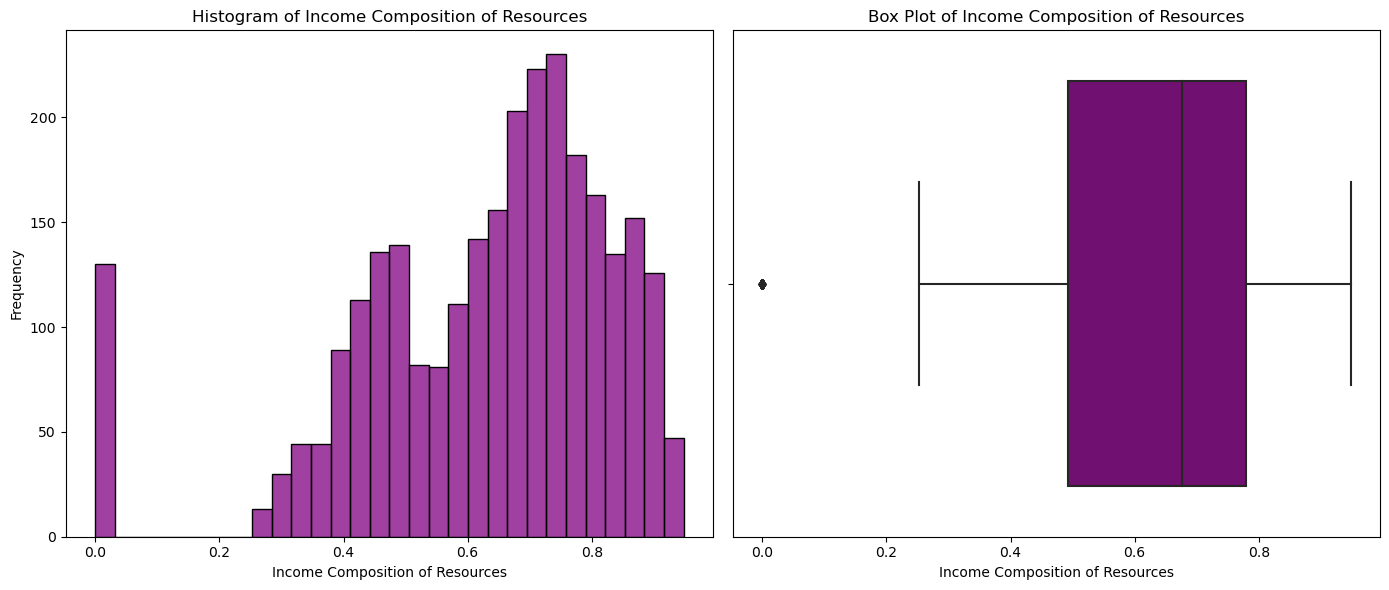

Missing values in 'income composition of resources' column: 167


In [98]:
plt.figure(figsize=(14, 6))

# Histogram for Income Composition of Resources
plt.subplot(1, 2, 1)
sns.histplot(df['Income composition of resources'].dropna(), kde=False, color='purple', bins=30)
plt.title('Histogram of Income Composition of Resources')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Frequency')

# Box plot for Income Composition of Resources
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income composition of resources'], color='purple')
plt.title('Box Plot of Income Composition of Resources')
plt.xlabel('Income Composition of Resources')

plt.tight_layout()
plt.show()

# Check for missing values in the Income Composition of Resources column
missing_income_comp = df['Income composition of resources'].isnull().sum()
print(f"Missing values in 'income composition of resources' column: {missing_income_comp}")


### Preprocessing Recommendations: 
* Handling missing values: *
- Check for correlations with other variables to impute missing values.
- Schooling has a high correlation with income composition (0.72), making it a good candidate for imputation.
- We can fit a linear regression model using "Schooling" to predict "Income Composition of Resources."
- Use this model to impute the missing values in the "Income Composition of Resources" column.

* Handling Outliers
Given that outliers might represent actual variations within specific countries, we should not cap or remove them without careful consideration.
Group data by country and handle outliers (Using log transformation) within each country separately if necessary.

# Column 22: Schooling

Description --> This column represents the average number of years of schooling completed by individuals.

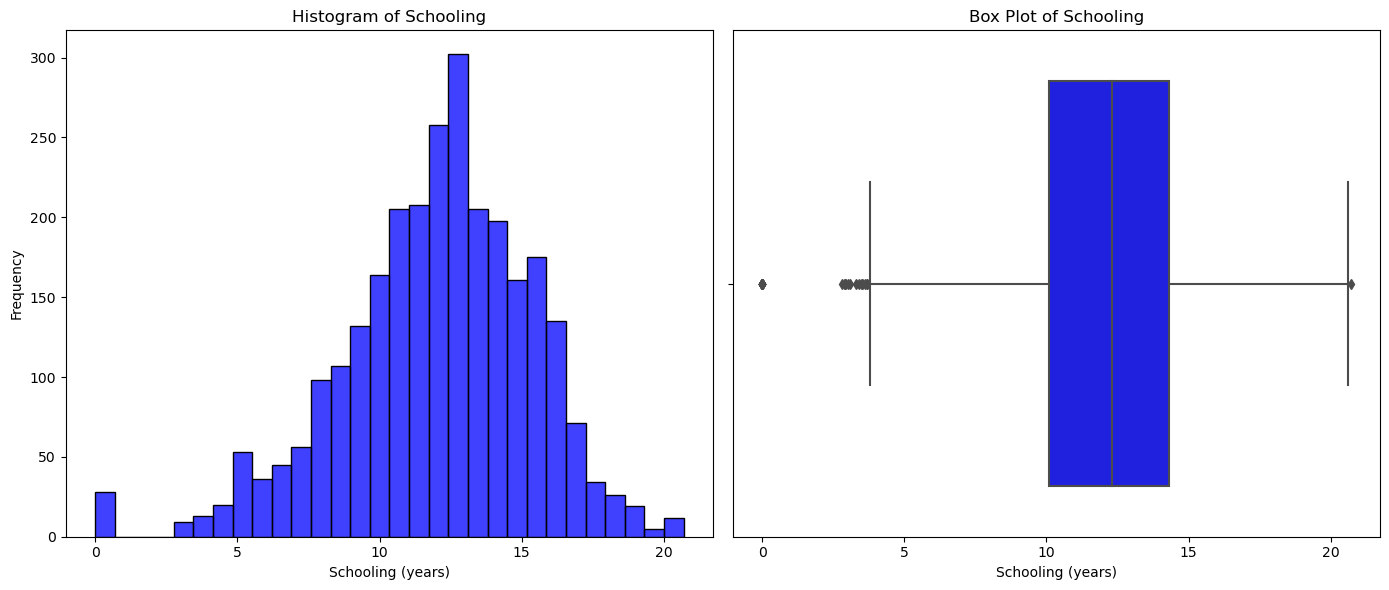

Missing values in 'schooling' column: 163


In [100]:
plt.figure(figsize=(14, 6))

# Histogram for Schooling
plt.subplot(1, 2, 1)
sns.histplot(df['Schooling'].dropna(), kde=False, color='blue', bins=30)
plt.title('Histogram of Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Frequency')

# Box plot for Schooling
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Schooling'], color='blue')
plt.title('Box Plot of Schooling')
plt.xlabel('Schooling (years)')

plt.tight_layout()
plt.show()

# Check for missing values in the Schooling column
missing_schooling = df['Schooling'].isnull().sum()
print(f"Missing values in 'schooling' column: {missing_schooling}")


### Preprocessing Recommendations: 
* Visualization Insights:
The histogram shows a fairly normal distribution, with most values centered around 10 to 15 years of schooling.
The box plot reveals a few outliers, particularly on the lower end.

- Since "Schooling" is highly correlated with "Income Composition of Resources" (0.75), it can be used for imputation.

Given that outliers might represent actual variations within specific countries, we should not cap or remove them without careful consideration.
Group data by country and handle outliers within each country separately if necessary.
